<a href="https://colab.research.google.com/github/Chutki319239/ELEVATE-AI-ML-task7-svm/blob/main/ElevateAI_ML_Task7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             roc_auc_score, confusion_matrix, classification_report, ConfusionMatrixDisplay)
from sklearn.decomposition import PCA
import joblib


In [2]:
# Load breast cancer dataset
df = pd.read_csv("breast-cancer.csv")

print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
display(df.head())


Shape: (569, 32)
Columns: ['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
target_col = 'diagnosis'   # adjust if your dataset uses another name

X = df.drop(columns=[target_col])
y = df[target_col]

# Encode target (M/B → 1/0)
le = LabelEncoder()
y = le.fit_transform(y)
print("Target classes:", list(le.classes_))


Target classes: ['B', 'M']


In [4]:
drop_cols = [c for c in X.columns if c.lower().startswith('id') or 'unnamed' in c.lower()]
if drop_cols:
    X = X.drop(columns=drop_cols)
    print("Dropped columns:", drop_cols)


Dropped columns: ['id']


In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)


In [6]:
svc_lin = SVC(kernel='linear', C=1.0, probability=True, random_state=42)
svc_lin.fit(X_train_scaled, y_train)

y_pred_lin = svc_lin.predict(X_test_scaled)
y_proba_lin = svc_lin.predict_proba(X_test_scaled)[:,1]

print("Linear SVM Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_lin))
print("Precision:", precision_score(y_test, y_pred_lin))
print("Recall:", recall_score(y_test, y_pred_lin))
print("F1:", f1_score(y_test, y_pred_lin))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_lin))


Linear SVM Results:
Accuracy: 0.9649122807017544
Precision: 1.0
Recall: 0.9047619047619048
F1: 0.95
ROC-AUC: 0.9914021164021164


In [7]:
svc_rbf = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True, random_state=42)
svc_rbf.fit(X_train_scaled, y_train)

y_pred_rbf = svc_rbf.predict(X_test_scaled)
y_proba_rbf = svc_rbf.predict_proba(X_test_scaled)[:,1]

print("RBF SVM Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rbf))
print("Precision:", precision_score(y_test, y_pred_rbf))
print("Recall:", recall_score(y_test, y_pred_rbf))
print("F1:", f1_score(y_test, y_pred_rbf))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_rbf))


RBF SVM Results:
Accuracy: 0.9736842105263158
Precision: 1.0
Recall: 0.9285714285714286
F1: 0.9629629629629629
ROC-AUC: 0.9947089947089947


In [8]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC(probability=True, random_state=42))
])

param_grid = [
    {'svc__kernel': ['linear'], 'svc__C': [0.01, 0.1, 1, 10, 100]},
    {'svc__kernel': ['rbf'], 'svc__C': [0.1, 1, 10, 100], 'svc__gamma': ['scale', 'auto', 0.01, 0.1, 1]}
]

gs = GridSearchCV(pipe, param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=1)
gs.fit(X_train, y_train)

print("Best Params:", gs.best_params_)
print("Best CV F1 Score:", gs.best_score_)

best_model = gs.best_estimator_


Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best Params: {'svc__C': 10, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}
Best CV F1 Score: 0.9647417647251947


Best Model Test Results:
Accuracy: 0.9736842105263158
Precision: 1.0
Recall: 0.9285714285714286
F1: 0.9629629629629629
ROC-AUC: 0.9927248677248677

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



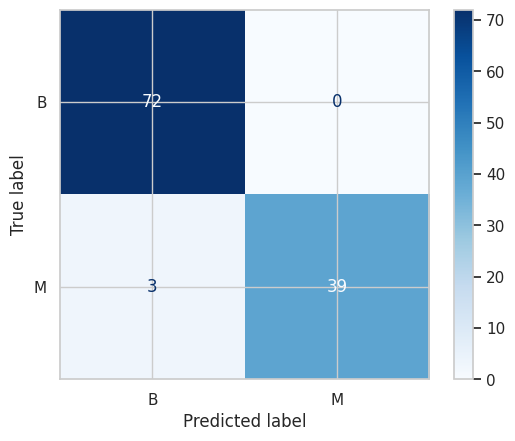

In [9]:
y_pred_best = best_model.predict(X_test)
y_proba_best = best_model.predict_proba(X_test)[:,1]

print("Best Model Test Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("Precision:", precision_score(y_test, y_pred_best))
print("Recall:", recall_score(y_test, y_pred_best))
print("F1:", f1_score(y_test, y_pred_best))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_best))

print("\nClassification Report:\n", classification_report(y_test, y_pred_best))

cm = confusion_matrix(y_test, y_pred_best)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap="Blues")
plt.show()


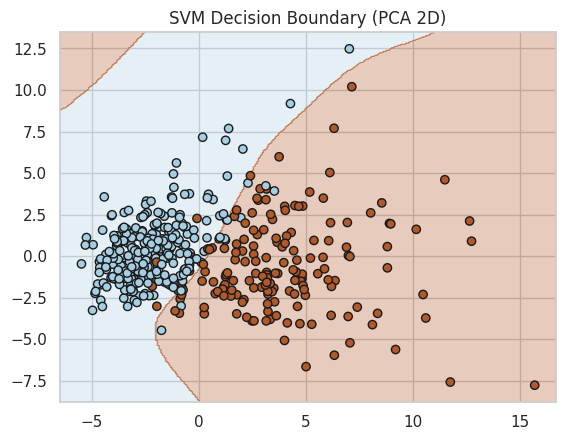

In [10]:
pca = PCA(n_components=2, random_state=42)
X_train_2d = pca.fit_transform(X_train_scaled)
X_test_2d = pca.transform(X_test_scaled)

svc_vis = SVC(kernel='rbf', C=best_model.named_steps['svc'].C,
              gamma=best_model.named_steps['svc'].gamma,
              probability=True).fit(X_train_2d, y_train)

# meshgrid
x_min, x_max = X_train_2d[:,0].min()-1, X_train_2d[:,0].max()+1
y_min, y_max = X_train_2d[:,1].min()-1, X_train_2d[:,1].max()+1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300), np.linspace(y_min, y_max, 300))
Z = svc_vis.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
plt.scatter(X_train_2d[:,0], X_train_2d[:,1], c=y_train, edgecolor='k', cmap=plt.cm.Paired)
plt.title("SVM Decision Boundary (PCA 2D)")
plt.show()


In [11]:
joblib.dump(best_model, "breast_cancer_svm.joblib")
print("Model saved as breast_cancer_svm.joblib")


Model saved as breast_cancer_svm.joblib
